In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


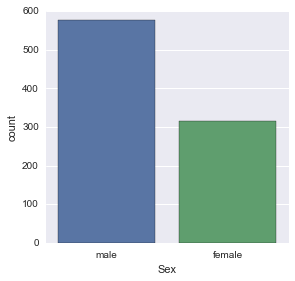

In [6]:
sns.factorplot('Sex',data=titanic_df,kind="count")

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


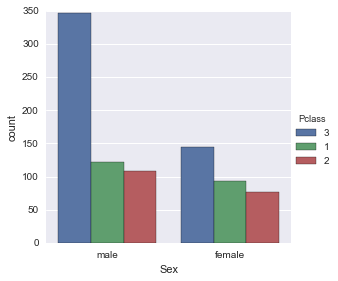

In [7]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


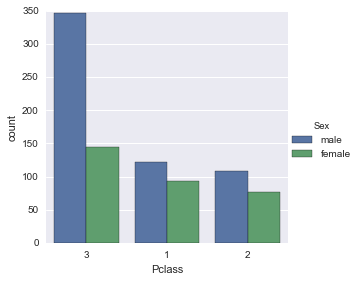

In [8]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [9]:
def male_female_child(passenger):
    age,sex = passenger
    
    if(age<16):
        return 'child'
    else:
        return sex

In [10]:
#using apply
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


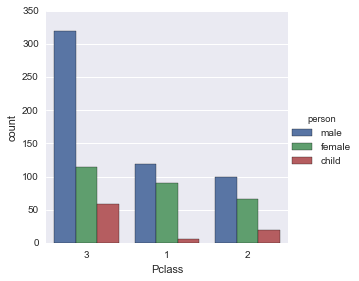

In [12]:
sns.factorplot('Pclass',data=titanic_df,hue="person",kind="count")

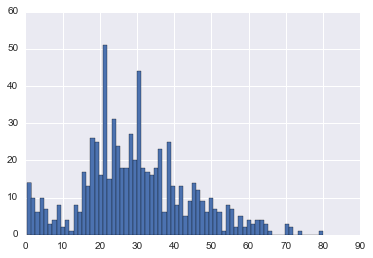

In [13]:
titanic_df['Age'].hist(bins=70)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


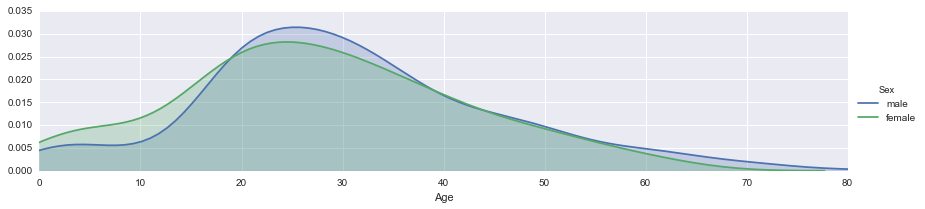

In [16]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


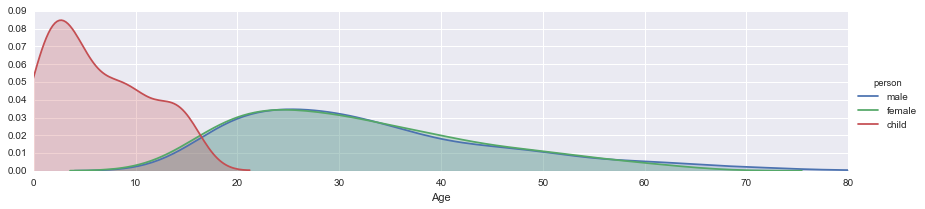

In [17]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


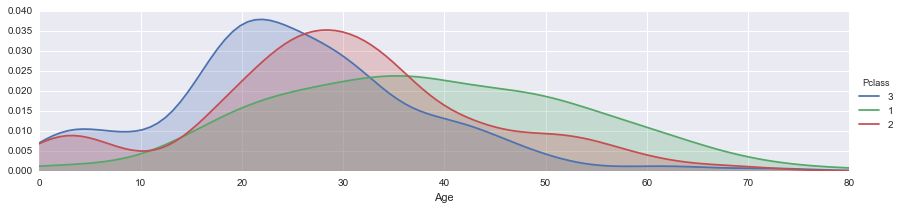

In [18]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

In [19]:
#What deck were they on and how does it relate to class
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [20]:
deck = titanic_df['Cabin'].dropna()

In [21]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


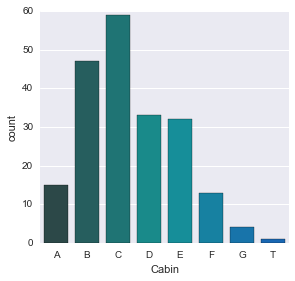

In [23]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d', kind='count',order=['A','B','C','D','E','F','G','T'])


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


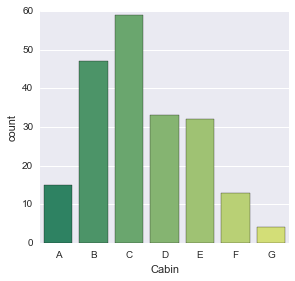

In [24]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data=cabin_df,palette='summer', kind='count',order=['A','B','C','D','E','F','G'])

In [25]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


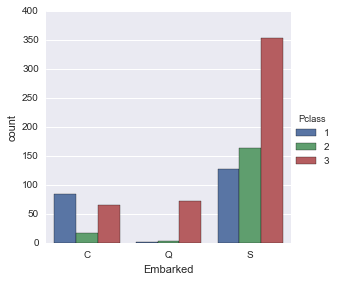

In [26]:
#Where did the passengers come from
sns.factorplot('Embarked', data=titanic_df,hue='Pclass',order=['C','Q','S'],hue_order=[1,2,3], kind="count")

In [27]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [28]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [29]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [30]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

D:\Users\Matt\Anaconda3\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


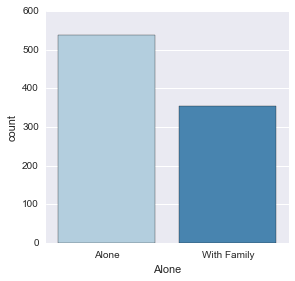

In [33]:
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count',order=["Alone","With Family"])

In [34]:
#What factors helped someone survive the sinking

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


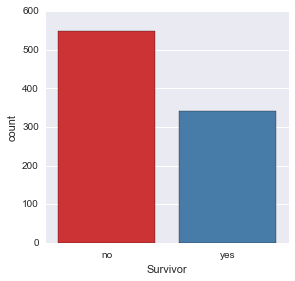

In [35]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind="count")

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


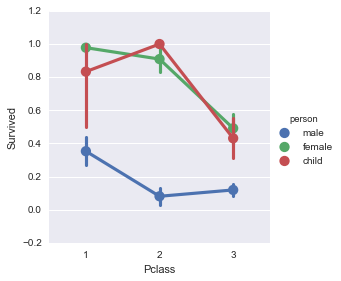

In [36]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person', order=[1,2,3])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


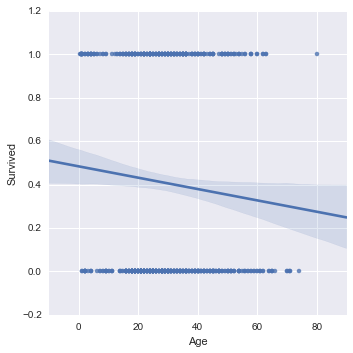

In [37]:
sns.lmplot('Age','Survived',data=titanic_df)

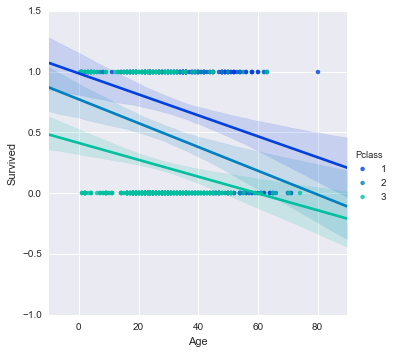

In [38]:
sns.lmplot('Age','Survived',data=titanic_df,hue="Pclass",hue_order=[1,2,3],palette='winter')

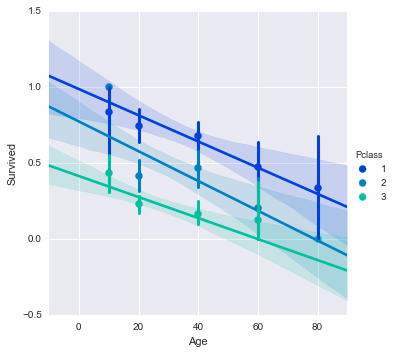

In [39]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,hue_order=[1,2,3],palette='winter', x_bins=generations)

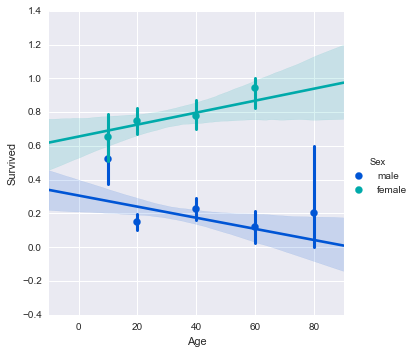

In [40]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of suriving the crash?

In [41]:
## MY approach question 1
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


In [42]:
#First lets add a new column to the table that is the deck.
def getDeckLetter(cabin):
    """This gets the cabin from titanic_df['Cabin'] object"""
    if type(cabin) == float:
        return np.nan
    elif cabin[0] == 'T':
        return np.nan
    else:
        return cabin[0];
    
#using apply
titanic_df['Deck'] = titanic_df['Cabin'].apply(getDeckLetter)

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN


In [44]:
titanic_deck = titanic_df.dropna(subset=['Deck'])
titanic_deck.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,Alone,yes,C


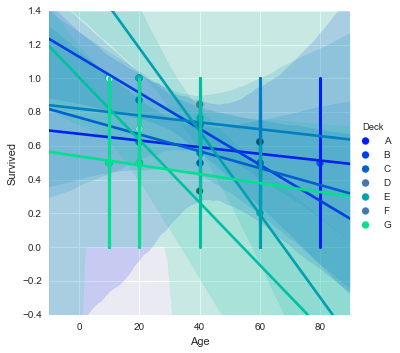

In [45]:
sns.lmplot('Age','Survived',hue="Deck", data=titanic_deck,palette='winter',
           hue_order=['A','B','C','D','E','F','G'], x_bins=generations).set(ylim=[-0.4,1.4])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


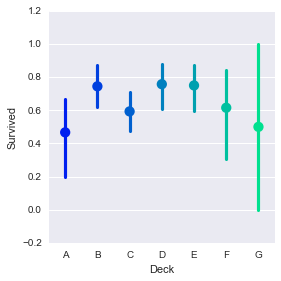

In [46]:
sns.factorplot('Deck','Survived',data=titanic_deck, palette='winter', order=['A','B','C','D','E','F','G'])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


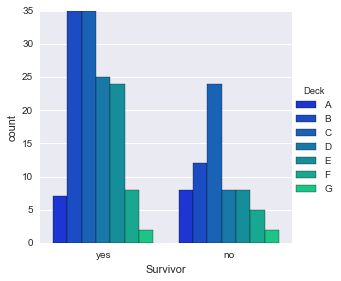

In [47]:
sns.factorplot('Survivor',hue='Deck', data=titanic_deck, palette='winter',
               hue_order=['A','B','C','D','E','F','G'], kind="count")

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


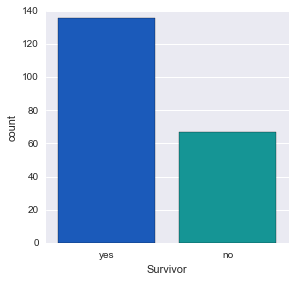

In [48]:
sns.factorplot('Survivor', data=titanic_deck, palette='winter', kind="count")

In [49]:
#Let's see who has deck information
def getDeckInfoPresent(cabin):
    """This gets the cabin from titanic_df['Cabin'] object"""
    if type(cabin) == float:
        return "No"
    elif cabin[0] == 'T':
         return "No"
    else:
        return "Yes";
    
#using apply
titanic_df['DeckInformation'] = titanic_df['Cabin'].apply(getDeckInfoPresent)

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


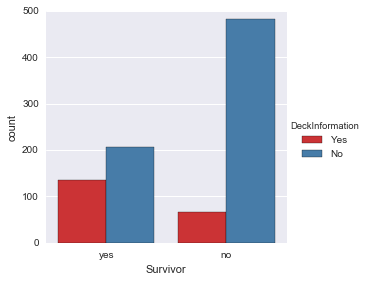

In [50]:
sns.factorplot('Survivor',hue='DeckInformation', data=titanic_df, palette='Set1', kind="count",
                order=['yes','no'], hue_order=['Yes','No'])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


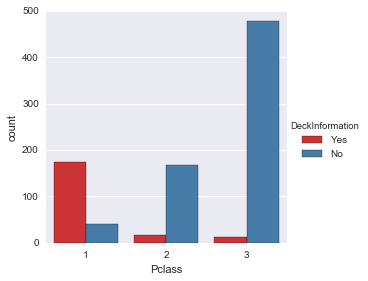

In [51]:
sns.factorplot('Pclass',hue='DeckInformation', data=titanic_df, palette='Set1', kind="count",
                order=[1,2,3], hue_order=['Yes','No'])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


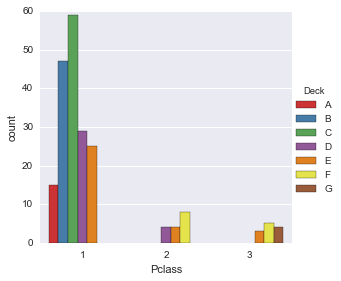

In [52]:
sns.factorplot('Pclass',hue='Deck', data=titanic_deck, palette='Set1', kind="count",
                order=[1,2,3], hue_order=['A','B','C','D','E','F','G'])

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


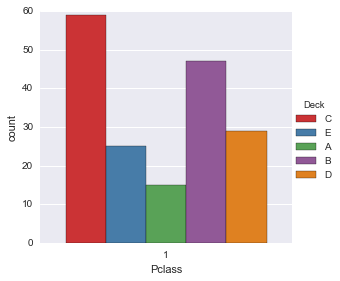

In [53]:
#So the data for deck is only really there for the first class. So we can sort of see how the deck effected them
titanic_deck = titanic_deck[titanic_deck['Pclass']==1]

sns.factorplot('Pclass',hue='Deck', data=titanic_deck, palette='Set1', kind="count")

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


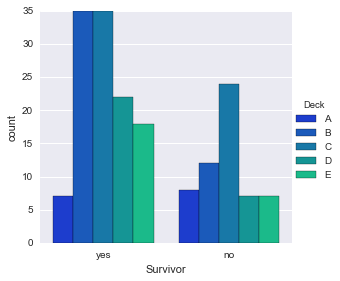

In [54]:
sns.factorplot('Survivor',hue='Deck', data=titanic_deck, palette='winter',
               hue_order=['A','B','C','D','E'], kind="count")

In [55]:
decks = ['A','B','C','D','E'];
adecks = {}
deck_survival = {}
total_on_deck = {}
rel_deck_survival = {}
for deck in decks:
    adecks[deck] = deck
    deck_survival[deck] = titanic_deck['Deck'].loc[titanic_deck['Deck']==deck].loc[titanic_deck['Survived']==1].count()
    total_on_deck[deck] = titanic_deck['Deck'].loc[titanic_deck['Deck']==deck].count()
    rel_deck_survival[deck] = deck_survival[deck]/total_on_deck[deck]

deck_survival_df = DataFrame({'Deck':adecks, 'Deck Survival':deck_survival, 'Total on Deck':total_on_deck, "Percentage":rel_deck_survival})
deck_survival_df.head()

,Deck,Deck Survival,Percentage,Total on Deck
A,A,7,0.466667,15
B,B,35,0.744681,47
C,C,35,0.593220,59
D,D,22,0.758621,29
E,E,18,0.720000,25


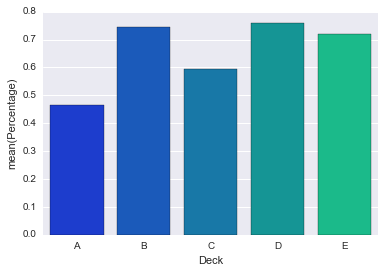

In [56]:
sns.barplot('Deck', 'Percentage', data=deck_survival_df, palette='winter')

D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


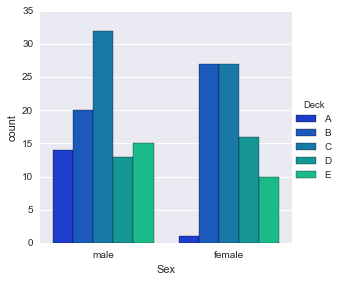

In [57]:
sns.factorplot('Sex',hue='Deck', data=titanic_deck, palette='winter', order=['male','female'],
               hue_order=['A','B','C','D','E'], kind="count")

In [58]:
#2.) Did having a family member increase the odds of suriving the crash?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck,DeckInformation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,NaN,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,NaN,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,yes,C,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no,NaN,No


D:\Users\Matt\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


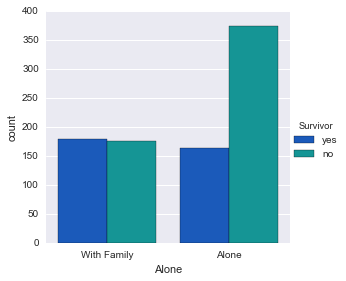

In [59]:
sns.factorplot('Alone',hue='Survivor',data=titanic_df,palette='winter',kind="count", hue_order=['yes','no'])

In [60]:
titanic_df[titanic_df['Survived']==1].count()

PassengerId        342
Survived           342
Pclass             342
Name               342
Sex                342
Age                290
SibSp              342
Parch              342
Ticket             342
Fare               342
Cabin              136
Embarked           340
person             342
Alone              342
Survivor           342
Deck               136
DeckInformation    342
dtype: int64